In [2]:
'''
Project Tasks
1. Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.

'''

import pandas as pd

# Load the Mobile Price dataset
df = pd.read_csv('train.csv')

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
# We have data regarding mobiles phones - and their internal properties

# columns:
'battery_power'
'blue'
'clock_speed'
'dual_sim'
'fc'
'four_g'
'int_memory'
'm_dep'
'mobile_wt'
'n_cores'
'pc'
'px_height'
'px_width'
'ram'
'sc_h'
'sc_w'
'talk_time'
'three_g'
'touch_screen'
'wifi'
'price_range'


number_of_phones = len(df)
number_of_phones

average_of_internal_memory = df['int_memory'].mean()
average_of_talk_time = df['talk_time'].mean()

how_many_are_dual_sim = df['dual_sim'].sum()

print(f"Number of phones: {number_of_phones}")
print(f"Average of internal memory: {average_of_internal_memory}")
print(f"Average of talk time: {average_of_talk_time}")

Number of phones: 2000
Average of internal memory: 32.0465
Average of talk time: 11.011


In [5]:
'''
2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.
'''

print(df.isnull().sum())
# There are no NA in this data set.

# There are no categorical items in this data set, so there's no need to transform data.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
# calculating statistical data over the RAM column - which is a very important feature of mobile phones
average_of_ram_size = df['ram'].mean()
median_of_ram_size = df['ram'].median()
std_of_ram_size = df['ram'].std()


from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis
skewness = skew(df['ram'])
kurtosis_value = kurtosis(df['ram'])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis_value)

Skewness: 0.006623063336208135
Kurtosis: -1.1919338732410705


In [7]:
from scipy import stats
import numpy as np

# We will perform a hypothesis testing for statistical significance between groups.
# The RAM size for the low-price phone and for the high-price phones.

# Null Hypothesis (H0):
# The average RAM size for low-price phones is equal to the average RAM size for high-price phones.

low_prices_ram = df[df['price_range'] == 0]['ram']
high_prices_ram = df[df['price_range'] == 3]['ram']

mean_low = np.mean(low_prices_ram)
std_low = np.std(low_prices_ram)
mean_high = np.mean(high_prices_ram)
std_high = np.std(high_prices_ram)

# 1. Ensure that the data follows a normal distribution (we can use a normality test like the Shapiro-Wilk test).
# 2. Check for equal variances using Levene's Test.

shapiro_stat, shapiro_p_value = stats.shapiro(low_prices_ram)

# shapiro_p_value < 0.05 , so the data does not follow a normal distribution.

# but let's assume the data does have a normal distribution.

t_stat, p_value = stats.ttest_ind(low_prices_ram, high_prices_ram, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

# if p_value < 0.05, there is a significant difference in RAM size between the groups.

t-statistic: -111.37307717748769, p-value: 0.0


Spearman correlation: SignificanceResult(statistic=0.05272980750327084, pvalue=0.018358102847590898)


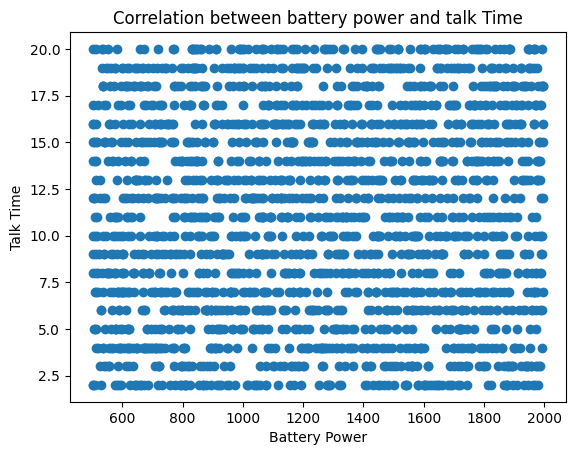

In [8]:
# let's check the correlation between battery power and talk time.

# Spearman correlation (because the data is not normally distributed)
spearman_correlation = stats.spearmanr(df['battery_power'], df['talk_time'])
print(f'Spearman correlation: {spearman_correlation}')

# Our data is mobile phone data - so it's not normaly distributed.

import matplotlib.pyplot as plt

plt.scatter(df['battery_power'], df['talk_time'])
plt.xlabel('Battery Power')
plt.ylabel('Talk Time')
plt.title('Correlation between battery power and talk Time')
plt.show()